In [112]:
import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.coord_categorisation
import pandas as pd

In [113]:
def add_year(cube):
    try:
        iris.coord_categorisation.add_year(cube, 'time', name='year')
    except:
        pass


def area_total(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'],iris.analysis.SUM, weights=grid_areas)

yearsec = 60.0 * 60.0 * 24.0 * 365.0

def kg_per_sec_2_Gt_per_yr(cube):
    cube = (cube * yearsec) / 1.0e12
    return cube

In [114]:
file = '/Users/ph290/Downloads/CO2-em-anthro_input4MIPs_emissions_ScenarioMIP_IAMC-REMIND-MAGPIE-ssp585-1-1_gn_201501-210012.nc'
# note that I think these are gridded fields for monthly emissions per decade not annual emissions...
# sectors: "0: Agriculture; 1: Energy; 2: Industrial; 3: Transportation; 4: Residential, Commercial, Other; 5: Solvents production and application; 6: Waste; 7: International Shipping; 8: Negative CO2 Emissions"
# units: kg m-2 s-1
# downloaded from https://esgf-node.llnl.gov/search/input4mips/ variable: CO2-em-anthro

In [115]:
cube = iris.load_cube(file)

### combine emissinos from multiple sectors

In [116]:
cube_all_sectors = cube.collapsed('sector',iris.analysis.SUM)

### calculate area weighted total

In [117]:
cube_all_sectors_area_total = area_total(cube_all_sectors)

/Users/ph290/miniconda2/envs/mypython3/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


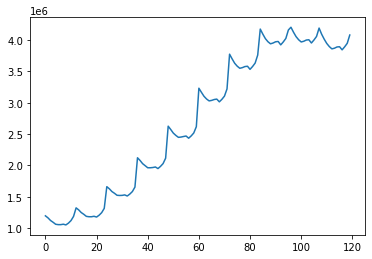

In [118]:
plt.plot(cube_all_sectors_area_total.data)

### Calculate annual mean 
note unit: kg CO2/s

In [119]:
try:
    iris.coord_categorisation.add_year(cube_all_sectors_area_total, 'time', name='year')
except:
    pass
    
cube_all_sectors_area_total_annual = cube_all_sectors_area_total.aggregated_by('year', iris.analysis.MEAN)
time_coord = cube_all_sectors_area_total_annual.coord('year').points

### Coonvert to Gt CO2 per year

In [120]:
cube_all_sectors_area_total_annual_gt_per_yr = kg_per_sec_2_Gt_per_yr(cube_all_sectors_area_total_annual)


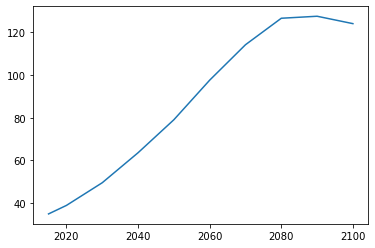

In [121]:
plt.plot(time_coord,cube_all_sectors_area_total_annual_gt_per_yr.data)

### Plot as Gt Carbon (not CO2) per year


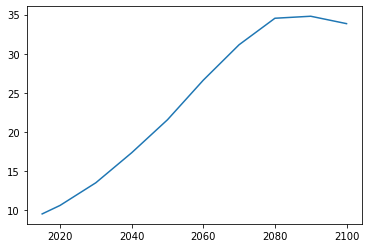

In [122]:
plt.plot(time_coord,cube_all_sectors_area_total_annual_gt_per_yr.data * ((1.0/44.009)*12.0))

## outputting data

In [123]:
df = pd.DataFrame({"Year" : time_coord, "CO2_emissions_Gt_C_per_yr" : cube_all_sectors_area_total_annual_gt_per_yr.data * ((1.0/44.009)*12.0)})
df.to_csv('/Users/ph290/Downloads/'+file.split('/')[-1].split('.')[0]+".csv", index=False)


In [124]:
cube_all_sectors_area_total_annual_gt_per_yr

Unknown (m-2.kg.s-1),time
Shape,10
Dimension coordinates,
time,x
Auxiliary coordinates,
year,x
Scalar coordinates,
latitude,"0.0 degrees, bound=(-90.0, 90.0) degrees"
longitude,"0.0 degrees, bound=(-180.0, 180.0) degrees"
sector,"4.0, bound=(-0.5, 8.5)"


In [125]:
cube[1].coord('time').points

array([1.5000e+01, 4.5000e+01, 7.4000e+01, 1.0500e+02, 1.3500e+02,
       1.6600e+02, 1.9600e+02, 2.2700e+02, 2.5800e+02, 2.8800e+02,
       3.1900e+02, 3.4900e+02, 1.8400e+03, 1.8700e+03, 1.8990e+03,
       1.9300e+03, 1.9600e+03, 1.9910e+03, 2.0210e+03, 2.0520e+03,
       2.0830e+03, 2.1130e+03, 2.1440e+03, 2.1740e+03, 5.4900e+03,
       5.5200e+03, 5.5490e+03, 5.5800e+03, 5.6100e+03, 5.6410e+03,
       5.6710e+03, 5.7020e+03, 5.7330e+03, 5.7630e+03, 5.7940e+03,
       5.8240e+03, 9.1400e+03, 9.1700e+03, 9.1990e+03, 9.2300e+03,
       9.2600e+03, 9.2910e+03, 9.3210e+03, 9.3520e+03, 9.3830e+03,
       9.4130e+03, 9.4440e+03, 9.4740e+03, 1.2790e+04, 1.2820e+04,
       1.2849e+04, 1.2880e+04, 1.2910e+04, 1.2941e+04, 1.2971e+04,
       1.3002e+04, 1.3033e+04, 1.3063e+04, 1.3094e+04, 1.3124e+04,
       1.6440e+04, 1.6470e+04, 1.6499e+04, 1.6530e+04, 1.6560e+04,
       1.6591e+04, 1.6621e+04, 1.6652e+04, 1.6683e+04, 1.6713e+04,
       1.6744e+04, 1.6774e+04, 2.0090e+04, 2.0120e+04, 2.0149e

In [126]:
1.5000e+01, 4.5000e+01, 7.4000e+01, 1.0500e+02, 1.3500e+02

(15.0, 45.0, 74.0, 105.0, 135.0)